In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from stompy.grid import unstructured_grid 
%matplotlib notebook

In [18]:
def parse_steps(fn):
    return pd.read_fwf(fn,
                       skiprows=1,names=['time','dts','dtsc','kkcflmx',
                                         'kcflmx_kbot','vol1','squ2D',
                                         'squ','sqi'],
                       widths=[14,14,14,8,8,14,14,14,14])
run46_p0=parse_steps("run_salt_20160520-v46/flowfm_0000.steps")
run47   =parse_steps("run_salt_20160520-v47/flowfm.steps")

In [19]:
run46_p0.head()

,time,dts,dtsc,kkcflmx,kcflmx_kbot,vol1,squ2D,squ,sqi
0,0.0000,1.0989,30.0,0,NaN,NaN,NaN,NaN,NaN
1,0.0183,1.2052,30.0,0,NaN,NaN,NaN,NaN,NaN
2,0.0384,1.3231,30.0,0,NaN,NaN,NaN,NaN,NaN
3,0.0605,1.4528,30.0,0,NaN,NaN,NaN,NaN,NaN
4,0.0847,1.5942,30.0,0,NaN,NaN,NaN,NaN,NaN


In [20]:
run47.head()

,time,dts,dtsc,kkcflmx,kcflmx_kbot,vol1,squ2D,squ,sqi
0,0.0000,1.0989,30.0,0,NaN,NaN,NaN,NaN,NaN
1,0.0183,1.2052,30.0,0,NaN,NaN,NaN,NaN,NaN
2,0.0384,1.3231,30.0,0,NaN,NaN,NaN,NaN,NaN
3,0.0605,1.4528,30.0,0,NaN,NaN,NaN,NaN,NaN
4,0.0847,1.5942,30.0,0,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>


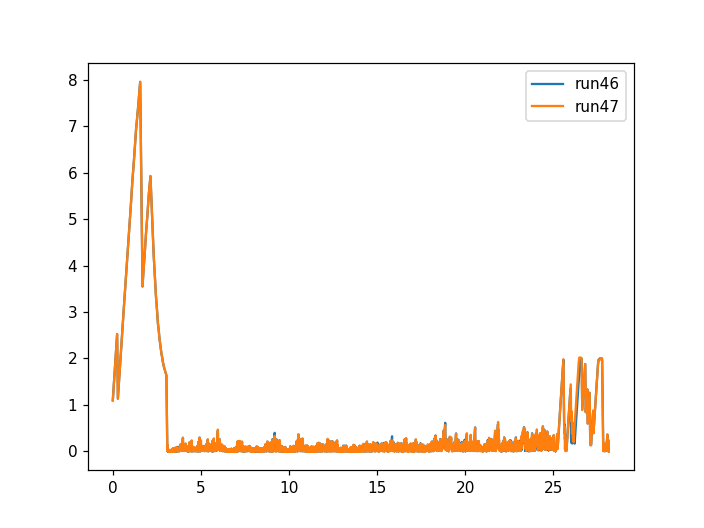

In [60]:
plt.figure()
plt.plot( run46_p0.time, run46_p0.dts,label='run46')
plt.plot( run47.time, run47.dts,label='run47')
plt.legend()

In [32]:
valid=~(run46_p0.vol1.isnull())
valid
run46_p0.kkcflmx[valid].max() # 2028 to 5420 

5420

In [34]:
valid=~(run47.vol1.isnull())
run47.kkcflmx[valid].min() # 3,68395

3

In [35]:
for proc in range(16):
    run46_pN=parse_steps(f"run_salt_20160520-v46/flowfm_{proc:04d}.steps")
    valid=~(run46_pN.vol1.isnull())
    mm=[run46_pN.kkcflmx[valid].min(),run46_pN.kkcflmx[valid].max()]
    print(proc,mm)

0 [2028, 5420]
1 [126, 685]
2 [58, 2954]
3 [689, 2337]
4 [649, 5446]
5 [29, 4612]
6 [nan, nan]
7 [1, 4195]
8 [nan, nan]
9 [nan, nan]
10 [nan, nan]
11 [2118, 2118]
12 [2, 2864]
13 [nan, nan]
14 [nan, nan]
15 [nan, nan]


In [ ]:
# Looks like kkcflmx is a proc-local cell index.

In [37]:
# 
g=unstructured_grid.UnstructuredGrid.read_ugrid("run_salt_20160520-v47/DFM_OUTPUT_flowfm/flowfm_map.nc")

In [39]:
g.Nedges() # 116k edges
g.Ncells() # 71832 cell

71832

<IPython.core.display.Javascript object>


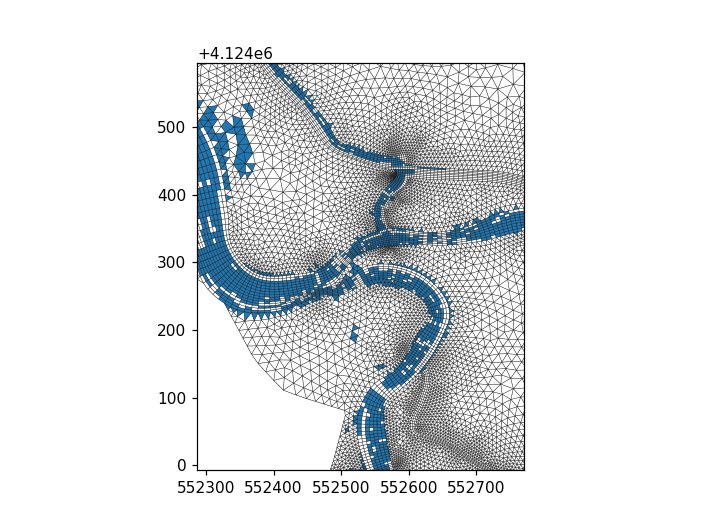

In [40]:
plt.figure()

valid=~(run47.vol1.isnull())
cells=np.unique(run47.kkcflmx[valid])

gcells=run47['kkcflmx'].values-1
g.plot_edges(color='k',lw=0.3)
g.plot_cells(mask=cells)

In [56]:
# same, but color by the shortest corresponding dtsc
dtsc_mins=run47[~run47.vol1.isnull()].groupby('kkcflmx')['dtsc'].min()
dtsc_mins

kkcflmx
3        0.0407
8        0.0343
11       0.0183
202      3.5787
5347     0.0210
          ...  
68282    0.0130
68338    0.0071
68339    0.0992
68340    0.2780
68395    0.2006
Name: dtsc, Length: 4664, dtype: float64

<IPython.core.display.Javascript object>


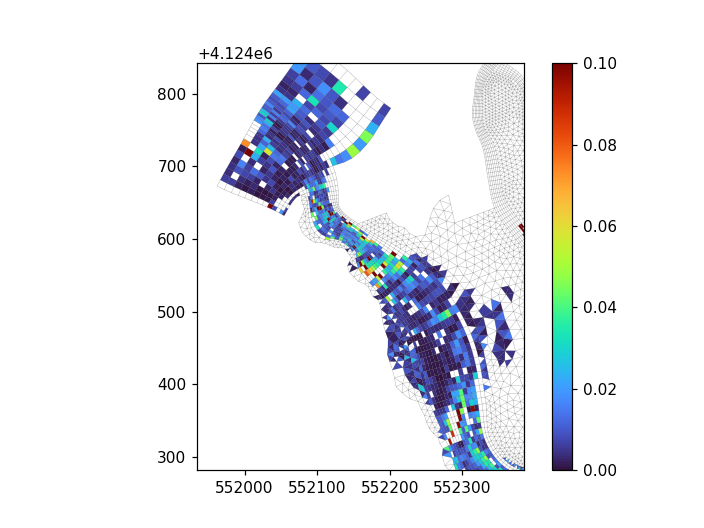

In [62]:
plt.figure()

g.plot_edges(color='k',lw=0.3,alpha=0.3)
ccoll=g.plot_cells(mask=dtsc_mins.index.values,values=dtsc_mins.values,cmap='turbo')
plt.colorbar(ccoll)
ccoll.set_clim([0,0.1])

In [66]:
# Any difference in layers with numtopsig=3?
import xarray as xr
his48=xr.open_dataset("run_salt_20160520-v48/DFM_OUTPUT_flowfm/flowfm_his.nc")
his47=xr.open_dataset("run_salt_20160520-v47/DFM_OUTPUT_flowfm/flowfm_his.nc")

In [72]:
stn_i=2
time_i=4
display(his47.isel(stations=stn_i,time=time_i).zcoordinate_w.values)
display(his48.isel(stations=stn_i,time=time_i).zcoordinate_w.values)


array([-0.16381791,  0.        ,  0.25      ,  0.5       ,  0.75      ,
        1.        ,  1.25      ,  1.5       ,  1.5535228 ,         nan,
               nan,         nan,         nan,         nan,         nan])

array([-0.16381791,  0.        ,  0.25      ,  0.5       ,  0.75      ,
        1.        ,  1.25      ,  1.5       ,  1.5535228 ,         nan,
               nan,         nan,         nan,         nan,         nan])

In [76]:
# Comparing runs
run46_p0=parse_steps("run_salt_20160520-v46/flowfm_0000.steps")
run47   =parse_steps("run_salt_20160520-v47/flowfm.steps")
run50   =parse_steps("run_salt_20160520-v50/flowfm_0000.steps")
run51   =parse_steps("run_salt_20160520-v51/flowfm_0000.steps")
names=['run46','run47','run50','run51']

In [78]:
run51.head()

,time,dts,dtsc,kkcflmx,kcflmx_kbot,vol1,squ2D,squ,sqi
0,0.0000,1.0989,30.0,0,NaN,NaN,NaN,NaN,NaN
1,0.0183,1.2052,30.0,0,NaN,NaN,NaN,NaN,NaN
2,0.0384,1.3231,30.0,0,NaN,NaN,NaN,NaN,NaN
3,0.0605,1.4528,30.0,0,NaN,NaN,NaN,NaN,NaN
4,0.0847,1.5942,30.0,0,NaN,NaN,NaN,NaN,NaN


In [77]:
for n,r in zip(names,[run46_p0,run47,run50,run51]):
    print(n, r['dts'].mean()) # 0.498s

run46 0.03713806497019817
run47 0.03734271529037109
run50 0.4978969757390653
run51 0.24886491635366503


<IPython.core.display.Javascript object>


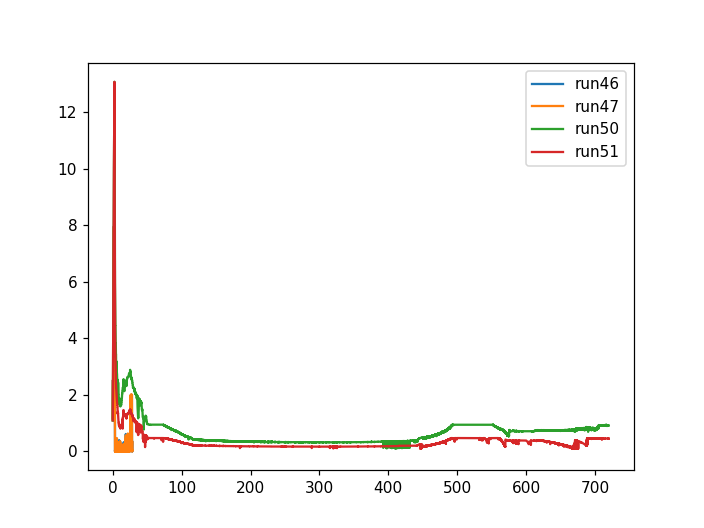

In [80]:
plt.figure()
for n,r in zip(names,[run46_p0,run47,run50,run51]):
    plt.plot(r['time'],r['dts'],label=n)
plt.legend()

In [81]:
map04=xr.open_dataset("run_salt_20160520-v51/DFM_OUTPUT_flowfm/flowfm_0004_map.nc")

In [82]:
g04=unstructured_grid.UnstructuredGrid.read_ugrid(map04)

<IPython.core.display.Javascript object>


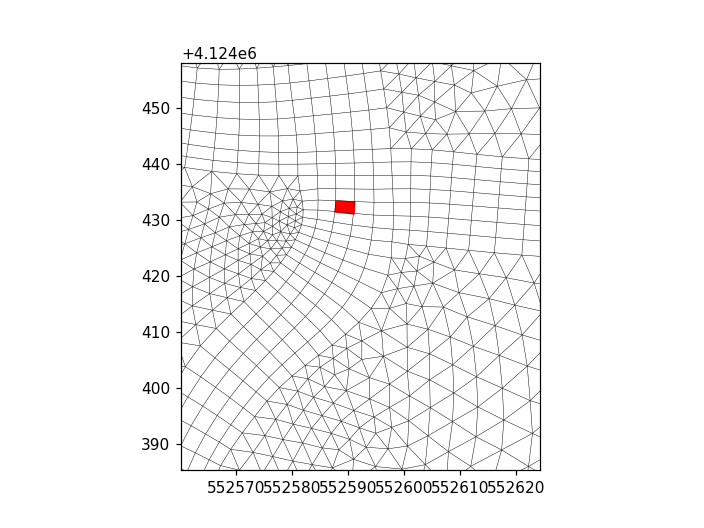

In [86]:
plt.figure()
g04.plot_edges(color='k',lw=0.3)
g04.plot_cells(mask=[3906-1],color='r')

In [84]:
run51_p4=parse_steps("run_salt_20160520-v51/flowfm_0004.steps")

In [85]:
run51_p4.groupby('kkcflmx').size()

kkcflmx
0        21129
2442        16
3605      2190
3679      8603
3756     14648
3830      9317
3906    117685
dtype: int64

<IPython.core.display.Javascript object>


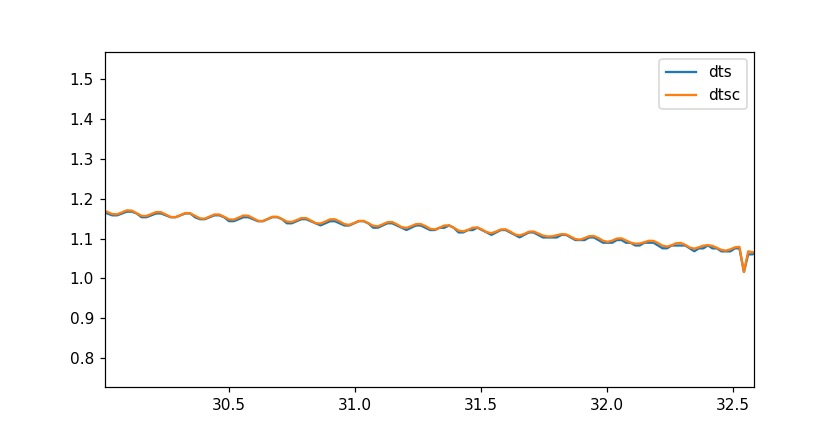

In [88]:
# Time series of proc 4 dts vs. dtsc
plt.figure()
plt.plot(run51_p4.time, run51_p4.dts,label='dts')
plt.plot(run51_p4.time, run51_p4.dtsc,label='dtsc')
plt.legend()

<IPython.core.display.Javascript object>


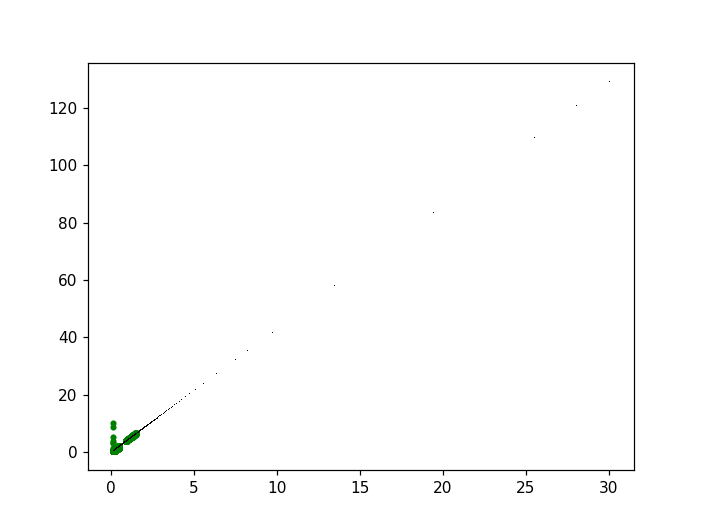

0.2331714215806215

In [111]:
plt.figure()
dt=run51_p4.dtsc.values
V_on_Q=(run51_p4.vol1/(run51_p4.squ)).values
valid=np.isfinite(V_on_Q)
mb=np.polyfit(dt[valid],V_on_Q[valid],1)
plt.plot(run51_p4.dtsc,run51_p4.vol1/(run51_p4.squ),'g.')
plt.plot(dt,np.polyval(mb,dt),'k,')

1./np.median(V_on_Q[valid] / dt[valid])

In [104]:
1./mb[0]

0.23217065415152552

0.2331714215806215